<a href="https://colab.research.google.com/github/PatrickPasolini/MLDM_PRJ/blob/main/progettoMLDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


link dataset: https://www.kaggle.com/datasets/meruvulikith/190k-spam-ham-email-dataset-for-classification?resource=download

In [30]:
import re
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
#df = pd.read_csv('/kaggle/input/190k-spam-ham-email-dataset-for-classification/spam_Emails_data.csv', encoding ='latin-1')
#df.isna().sum()

-----------------------------------------------------------------

98.5% ACCURACY | BASIC NLP


In [32]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
meruvulikith_190k_spam_ham_email_dataset_for_classification_path = kagglehub.dataset_download('meruvulikith/190k-spam-ham-email-dataset-for-classification')

print('Data source import complete.')


Data source import complete.


In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/190k-spam-ham-email-dataset-for-classification/spam_Emails_data.csv


In [34]:
data = pd.read_csv('/kaggle/input/190k-spam-ham-email-dataset-for-classification/spam_Emails_data.csv')
print(data.head())
print(data.info())

  label                                               text
0  Spam  viiiiiiagraaaa\nonly for the ones that want to...
1   Ham  got ice thought look az original message ice o...
2  Spam  yo ur wom an ne eds an escapenumber in ch ma n...
3  Spam  start increasing your odds of success & live s...
4   Ham  author jra date escapenumber escapenumber esca...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193852 entries, 0 to 193851
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   193852 non-null  object
 1   text    193850 non-null  object
dtypes: object(2)
memory usage: 3.0+ MB
None


In [35]:
print(data.isna().sum())

label    0
text     2
dtype: int64


In [36]:
data = data.dropna(subset=['text', 'label']).reset_index(drop=True)

In [37]:
print(data.isna().sum())

label    0
text     0
dtype: int64


In [38]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193850 entries, 0 to 193849
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   193850 non-null  object
 1   text    193850 non-null  object
dtypes: object(2)
memory usage: 3.0+ MB
None


In [39]:
print(data.isna().sum())

label    0
text     0
dtype: int64


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

data['text'] = data['text'].str.lower()

encoder = LabelEncoder()
data['label'] = encoder.fit_transform(data['label'])

X = data['text']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = classifier.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")

print("Confusion Matrix:")
print(confusion)

print("Classification Report:")
print(report)

Accuracy: 0.9608718080990456
Confusion Matrix:
[[19995   322]
 [ 1195 17258]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     20317
           1       0.98      0.94      0.96     18453

    accuracy                           0.96     38770
   macro avg       0.96      0.96      0.96     38770
weighted avg       0.96      0.96      0.96     38770



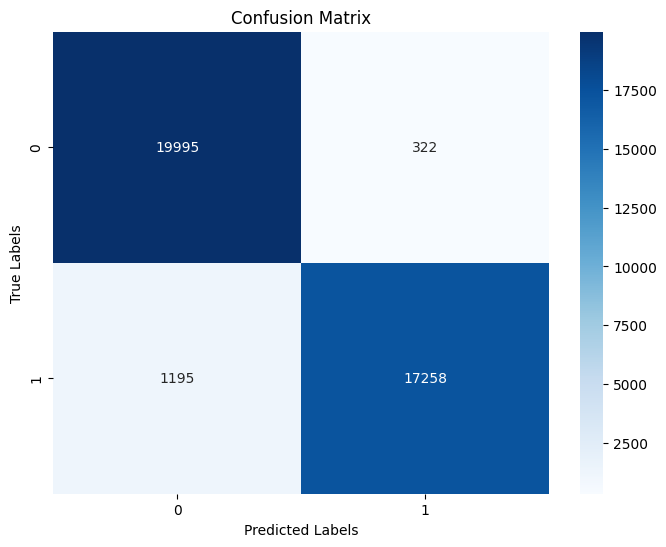

In [43]:
#visualize confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()